In [1]:
/%config InlineBackend.figure_formats = ['svg']
import quimb as qu
import quimb.tensor as qtn
import itertools
peps = qtn.PEPS.rand(Lx=4, Ly=4, bond_dim=3, seed=666)
peps.arrays

(array([[[ 0.19758123, -0.20600803],
         [-0.02115149, -0.30155026],
         [ 0.08369179,  0.42321298]],
 
        [[-0.78599677,  0.27198615],
         [-0.01315806, -0.26534693],
         [-0.00531344,  0.33645332]],
 
        [[-0.57577375,  0.10554638],
         [-0.07281841,  0.45726951],
         [ 0.26362141, -0.08463805]]]),
 array([[[[-0.0886793 ,  0.38960521],
          [-0.07864096, -0.1405622 ],
          [-0.27039043,  0.40912656]],
 
         [[-0.25722849, -0.3621938 ],
          [-0.01145245,  0.07481682],
          [-0.04101569, -0.31399061]],
 
         [[-0.0585233 ,  0.08844857],
          [-0.34306234,  0.14325768],
          [ 0.44382168, -0.17613362]]],
 
 
        [[[-0.11086622, -0.07888345],
          [-0.08731526, -0.1098593 ],
          [-0.08997919, -0.25855771]],
 
         [[-0.00974778, -0.06474578],
          [-0.53768285,  0.26626594],
          [ 0.1852418 , -0.17064799]],
 
         [[-0.23546533,  0.10044162],
          [-0.04641026, -0.33127

In [120]:
import numpy as np
a , b = 2, 50
M1 = np.random.normal(size=(a, b))+1
M2 = np.random.normal(size=(a, b, b))+1
M3 = np.random.normal(size=(a, b, b))+1
M4 = np.random.normal(size=(a, b)+1)
U1, S1, V1 = np.linalg.svd(M1, full_matrices=False)
M2d = M2.reshape(a*b , b)
U2, S2, V2 = np.linalg.svd(M2d, full_matrices=False)

In [121]:
U2a, S2a, V2a = np.linalg.svd((M2 @ V1.T) @ S1, full_matrices=False)
print(S1)
print(S2a)
print(S2)

[12.83633724  5.90143081]
[841.40839832  87.71228907]
[72.81852782 16.20100436 16.12619038 15.52650211 15.34691751 15.0391183
 14.18272074 13.64585923 13.56323137 13.52060136 13.10361936 12.94580683
 12.48235942 12.02394014 11.72607622 11.69912331 11.37003241 10.89649694
 10.78734355 10.33979241 10.10450808  9.74831755  9.3981131   9.29155897
  9.20320481  8.93178615  8.83026678  8.73836702  8.47863986  8.13575516
  7.86167956  7.75026112  7.57484659  7.36258601  7.15020101  6.84731241
  6.56727571  6.49731708  6.34239758  6.02559028  5.73165109  5.50680624
  5.39448304  4.972193    4.68399408  4.3959673   4.19704594  3.86843547
  3.50321357  2.89554467]


In [123]:
print(S1)
U1c, S1c, V1c = np.linalg.svd(M1 - 1, full_matrices=False)
print(S1c)

[12.83633724  5.90143081]
[8.4597082  5.25507063]


In [86]:
from scipy.stats import ortho_group
M = ortho_group.rvs(dim=2)
A = np.random.normal(size=(2, 2))
print(np.trace(M @ A + A.T @ M.T))
print(np.trace(A + A.T))

-0.7766589010848943
-2.742594121992139


In [61]:
lplus = (1 + np.sqrt(a/b))**2
lminus = (1 - np.sqrt(a/b))**2
x = np.linspace(lminus, lplus, 1001)
p = 1/(2*np.pi)*np.sqrt((lplus - x)*(x - lminus))/(a/b*x)

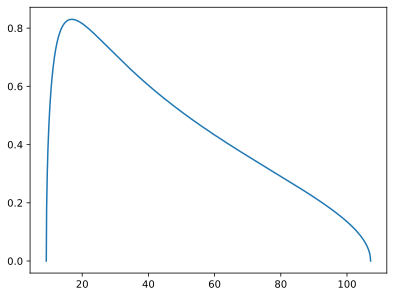

(array([16., 21., 19., 23., 20., 22., 20., 20., 19., 19., 19., 17., 18.,
        17., 15., 16., 16., 14., 16., 13., 13., 14., 11., 14., 12., 12.,
        13.,  9., 10., 10.,  9.,  9.,  9., 10.,  8.,  8.,  7.,  7.,  6.,
         8.,  5.,  5.,  7.,  4.,  5.,  5.,  3.,  3.,  2.,  2.]),
 array([  9.61439122,  11.54574933,  13.47710743,  15.40846554,
         17.33982364,  19.27118175,  21.20253985,  23.13389795,
         25.06525606,  26.99661416,  28.92797227,  30.85933037,
         32.79068848,  34.72204658,  36.65340468,  38.58476279,
         40.51612089,  42.447479  ,  44.3788371 ,  46.31019521,
         48.24155331,  50.17291141,  52.10426952,  54.03562762,
         55.96698573,  57.89834383,  59.82970193,  61.76106004,
         63.69241814,  65.62377625,  67.55513435,  69.48649246,
         71.41785056,  73.34920866,  75.28056677,  77.21192487,
         79.14328298,  81.07464108,  83.00599919,  84.93735729,
         86.86871539,  88.8000735 ,  90.7314316 ,  92.66278971,
         94.

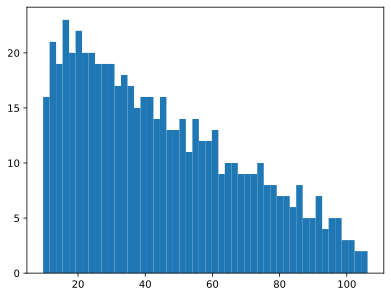

In [63]:

import matplotlib.pyplot as plt
plt.hist(S**2/np.sqrt(b), bins = 50)

In [3]:
import quimb as qu
import quimb.tensor as qtn

# Define your custom Hamiltonian function
def my_hamiltonian(L):
    # L is the system size
    # This example assumes a simple model; replace with your custom terms
    H = sum(qu.pauli('Z', i) for i in range(L)) + \
        sum(qu.pauli('X', i) @ qu.pauli('X', i+1) for i in range(L-1))
    return H

# System size
L = 10

# Create the Hamiltonian
H = my_hamiltonian(L)

# Convert to a Matrix Product Operator (MPO)
H_mpo = qtn.MPO_ham_heis(L, j=1.0, bz=0.0, S=1/2, cyclic=False)

# Initialize the DMRG solver with the Hamiltonian MPO
dmrg = qtn.DMRG2(H_mpo)

# Run the DMRG algorithm to find the ground state
energy = dmrg.solve(tol=1e-6, verbosity=2)

print(f"Ground State Energy: {energy}")


AttributeError: module 'quimb.tensor' has no attribute 'MPO_ham_1d'

In [22]:
import numpy as np
prob = peps.contract(all, optimize='auto-hq')
prob

Tensor(shape=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2), inds=('k0,0', 'k0,1', 'k0,2', 'k0,3', 'k1,0', 'k1,1', 'k1,2', 'k1,3', 'k2,0', 'k2,1', 'k2,2', 'k2,3', 'k3,0', 'k3,1', 'k3,2', 'k3,3'), tags=oset(['I0,0', 'X0', 'Y0', 'I0,1', 'Y1', 'I0,2', 'Y2', 'I0,3', 'Y3', 'I1,0', 'X1', 'I1,1', 'I1,2', 'I1,3', 'I2,0', 'X2', 'I2,1', 'I2,2', 'I2,3', 'I3,0', 'X3', 'I3,1', 'I3,2', 'I3,3']))

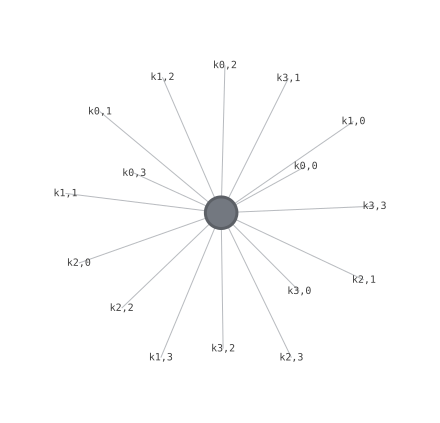

In [27]:
prob.draw()

In [25]:
dis = [i**2+j**2+k**2+l**2 for i in range(16) for j in range(16) for k in range(16) for l in range(16) ]


In [26]:
import numpy as np
a = np.unique(np.array(dis), return_counts= True)

In [27]:
a[1]

array([  1,   4,   6,   4,   5,  12,  12,   4,   6,  16,  18,  12,   8,
        16,  24,  12,   5,  24,  30,  16,  18,  28,  24,  12,  12,  28,
        42,  28,  12,  36,  48,  16,   6,  36,  42,  36,  29,  28,  48,
        28,  18,  48,  60,  28,  24,  60,  48,  24,   8,  44,  72,  48,
        30,  48,  84,  36,  24,  52,  54,  48,  36,  52,  72,  52,   5,
        72,  96,  40,  42,  72,  84,  36,  30,  52,  90,  76,  36,  72,
        96,  40,  18,  88,  78,  60,  60,  72,  96,  60,  24,  84, 150,
        68,  36,  76,  96,  60,  12,  64, 114,  96,  59,  96, 120,  52,
        42, 120, 102,  72,  68,  76, 144,  76,  12,  84, 144,  84,  66,
       124, 108,  72,  48,  88, 126,  96,  48, 120, 192,  64,   6, 124,
       144,  96,  84,  92, 144, 120,  42,  96, 168,  88,  84, 120, 120,
        84,  29, 120, 162, 128,  66, 120, 216,  76,  48, 156, 168, 120,
        84, 100, 144, 108,  18, 144, 210,  88,  90, 168, 156,  84,  60,
       116, 204, 160,  72, 132, 216, 124,  24, 132, 162, 120, 13

In [28]:
np.unique(a[1])

array([  1,   4,   5,   6,   8,  10,  12,  16,  18,  19,  20,  24,  28,
        29,  30,  32,  36,  40,  42,  44,  48,  52,  54,  58,  59,  60,
        61,  64,  66,  68,  72,  74,  76,  78,  84,  86,  88,  90,  92,
        96,  98, 100, 101, 102, 104, 108, 112, 114, 116, 120, 124, 126,
       128, 132, 136, 138, 140, 144, 145, 148, 150, 152, 156, 160, 162,
       168, 172, 174, 176, 180, 184, 186, 192, 196, 198, 204, 208, 210,
       212, 216, 222, 228, 234, 240, 244, 252, 258, 264, 276, 288, 312,
       318, 324, 330, 384], dtype=int64)

array([ 1,  1,  1, ..., 72, 72, 72], dtype=int64)